In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from keras.datasets import reuters
# built in keras function for one-hot encoding
from tensorflow.keras.utils import to_categorical

max_features = 500

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(path='/kaggle/input/reuters/reuters.npz', num_words=max_features)

x_train = vectorize_sequences(train_data, max_features)
x_test = vectorize_sequences(test_data, max_features)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

print(f'partial_x_train sample : {partial_x_train.shape}')

# Определяем модель RNN
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dense(units=46, activation='softmax'))

# Компилируем модель
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.summary()

print(f'partial_y_train sample : {partial_y_train.shape}')
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))
                    
results = model.evaluate(x_test, one_hot_test_labels)

partial_x_train sample : (7982, 500)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          32000     
                                                                 
 bidirectional_2 (Bidirecti  (None, None, 128)         66048     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 46)                5934      
                                                                 
Total params: 202798 (792.18 KB)
Trainable params: 202798 (792.18 KB)
Non-trainable params: 0 (0.00 Byte)
___________________________________________

In [3]:
print(results)
model.metrics_names

[2.033108711242676, 0.45725736021995544]


['loss', 'accuracy']

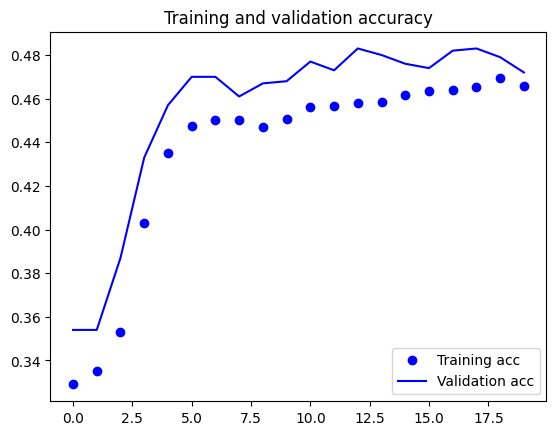

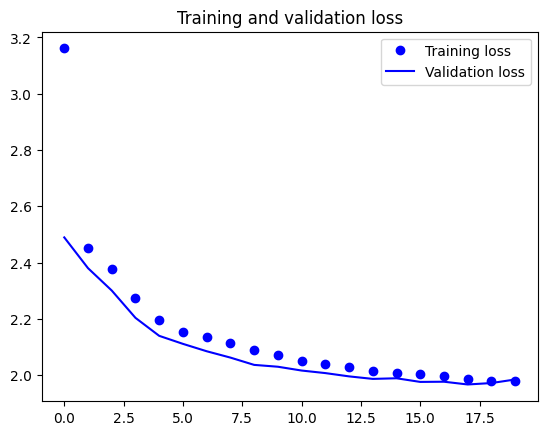

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()